<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [32]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-05 12:54:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.7’

survey-data.csv.7   100%[===================>] 152.13M  70.3MB/s    in 2.2s    

2025-07-05 12:54:05 (70.3 MB/s) - ‘survey-data.csv.7’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [33]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [34]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [35]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [36]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [37]:
# QUERY = """
# SELECT COUNT(*) 
# FROM main
# """
# df = pd.read_sql_query(QUERY, conn)
# df.head()

QUERY = " SELECT COUNT(*) FROM main "
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [38]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)




,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [39]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [40]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


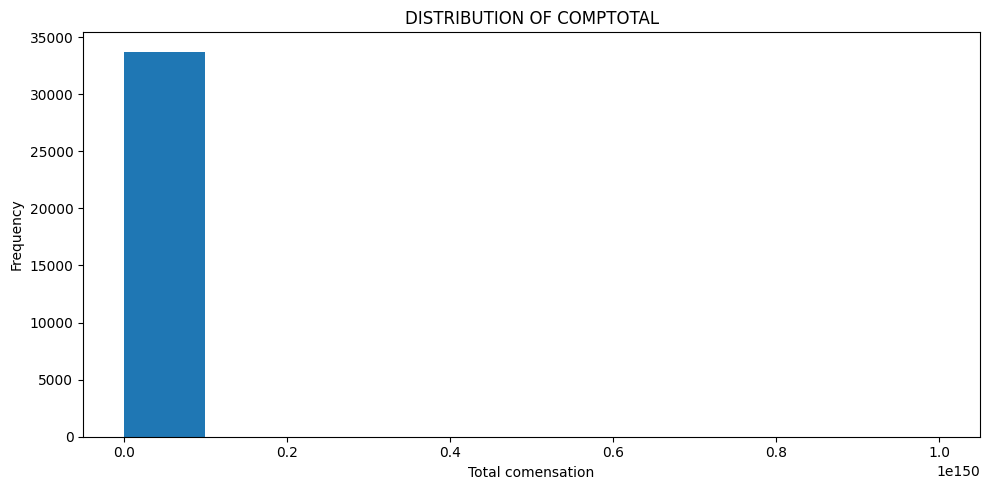

In [42]:
## Write your code

# QUERY = "SELECT CompTotal FROM main" 
# df = pd.read_sql_query(QUERY, conn) 

# plt.figure(figsize=(10, 6))
# plt.hist(df['CompTotal'].dropna(), bins=30, color='skyblue', edgecolor='black')
# plt.title('Distribution of Total Compensation')
# plt.xlabel('Total Compensation')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()
conn = sqlite3.connect('survey-data.sqlite')
QUERY = """
SELECT CompTotal FROM main
"""
df= pd.read_sql_query(QUERY, conn) 
plt.figure(figsize = (10,5)) 
plt.hist(df['CompTotal'].dropna()) 
plt.title('DISTRIBUTION OF COMPTOTAL') 
plt.xlabel('Total comensation')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()


**Box Plots**

Plot a box plot of Age.


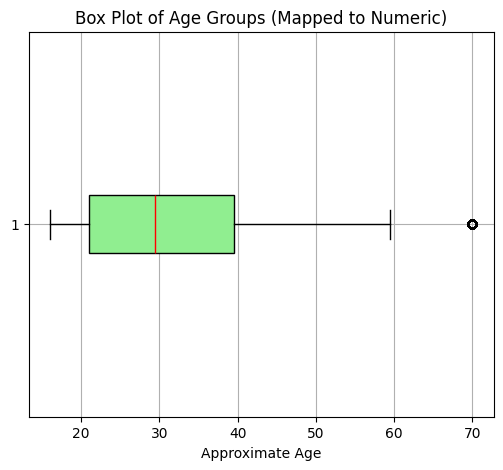

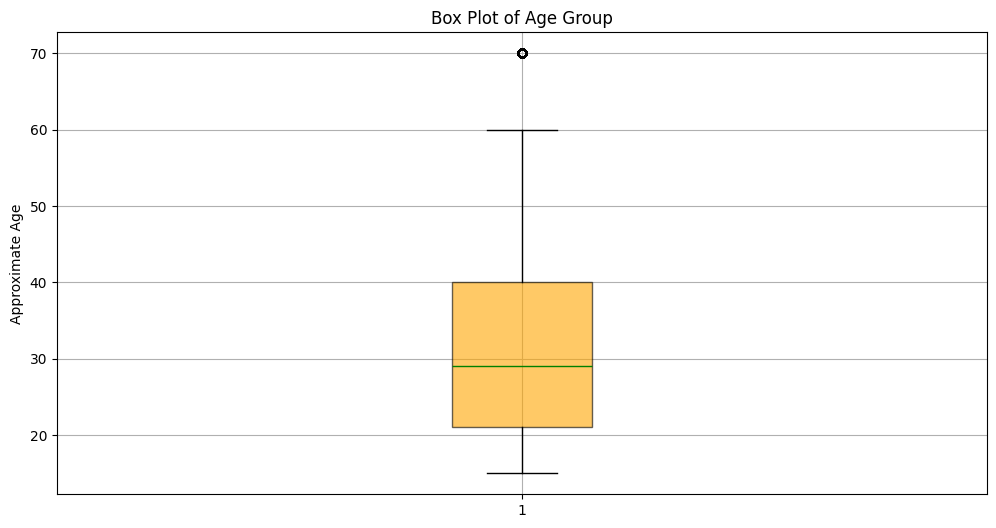

In [49]:
## Write your code here
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
query = "SELECT Age FROM main"
df_age = pd.read_sql_query(query, conn)
df_age['AgeMapped'] = df_age['Age'].map(age_map) 
df_age_cleaned = df_age.dropna(subset =['AgeMapped']) 


plt.figure(figsize=(6, 5))
plt.boxplot(df_age_cleaned['AgeMapped'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Age Groups (Mapped to Numeric)')
plt.xlabel('Approximate Age')
plt.grid(True)
plt.show()

age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None 
}
df_age = pd.read_sql("SELECT Age FROM main", conn) 
df_age['AGE_MAP'] = df_age['Age'].map(age_map) 
df_age_cleaned = df_age.dropna(subset =['AGE_MAP'])
plt.figure(figsize = (12,6)) 
plt.boxplot(df_age_cleaned['AGE_MAP'], patch_artist=True, boxprops = dict(facecolor ='orange',alpha =0.6, edgecolor ='black'), medianprops=dict(color ='green'))
plt.title('Box Plot of Age Group')
plt.ylabel('Approximate Age') 
plt.grid(True) 
plt.show() 


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


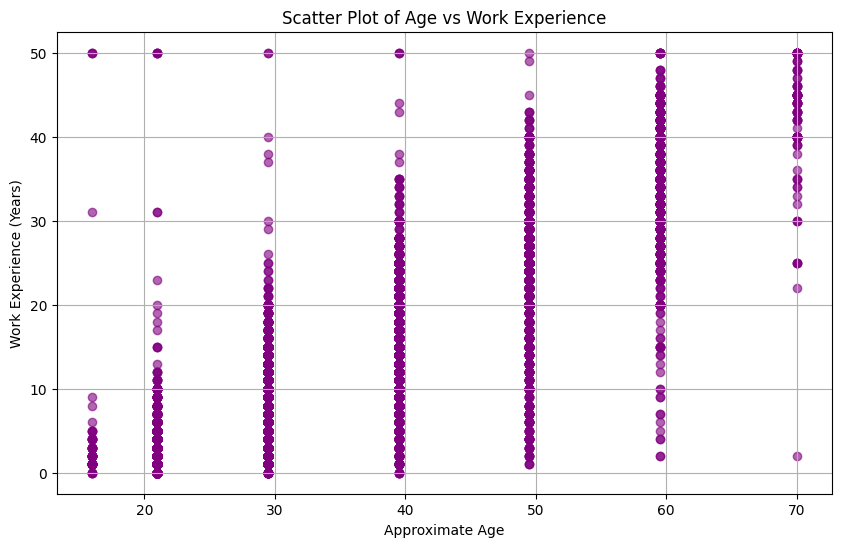

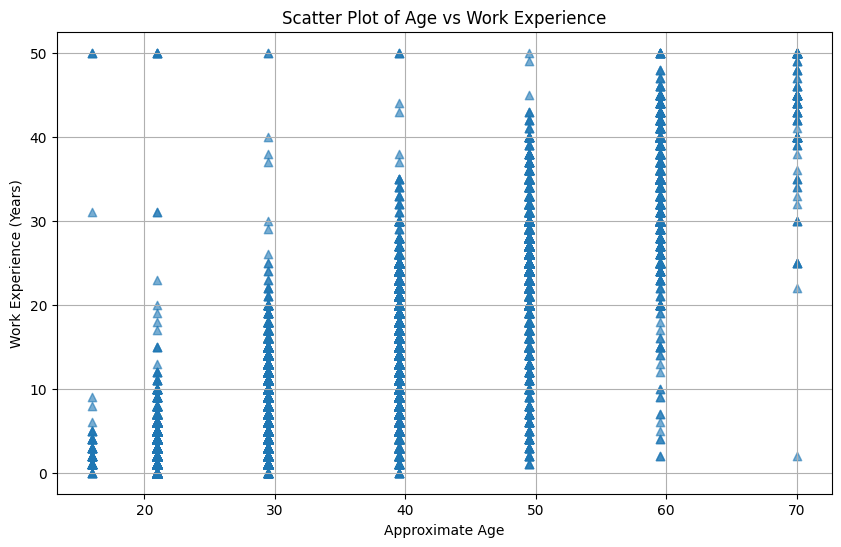

In [54]:
## Write your code here

QUERY = "SELECT Age, WorkExp FROM main"
df = pd.read_sql_query(QUERY, conn)

# Step 2: Define mapping from age groups to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 3: Clean and transform data
df['AgeMapped'] = df['Age'].map(age_map)
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop rows where either value is missing
df_cleaned = df.dropna(subset=['AgeMapped', 'WorkExp'])

# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeMapped'], df_cleaned['WorkExp'], alpha=0.6, color='purple')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Approximate Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

QUERY = """
SELECT Age, WorkExp FROM main 
""" 
df['AGEMAPPED'] = df['Age'].map(age_map) 
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce') 

df_cleaned = df.dropna(subset =['AGEMAPPED','WorkExp']) 
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AGEMAPPED'], df_cleaned['WorkExp'], alpha =0.6, marker ='^') 
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Approximate Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()



**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


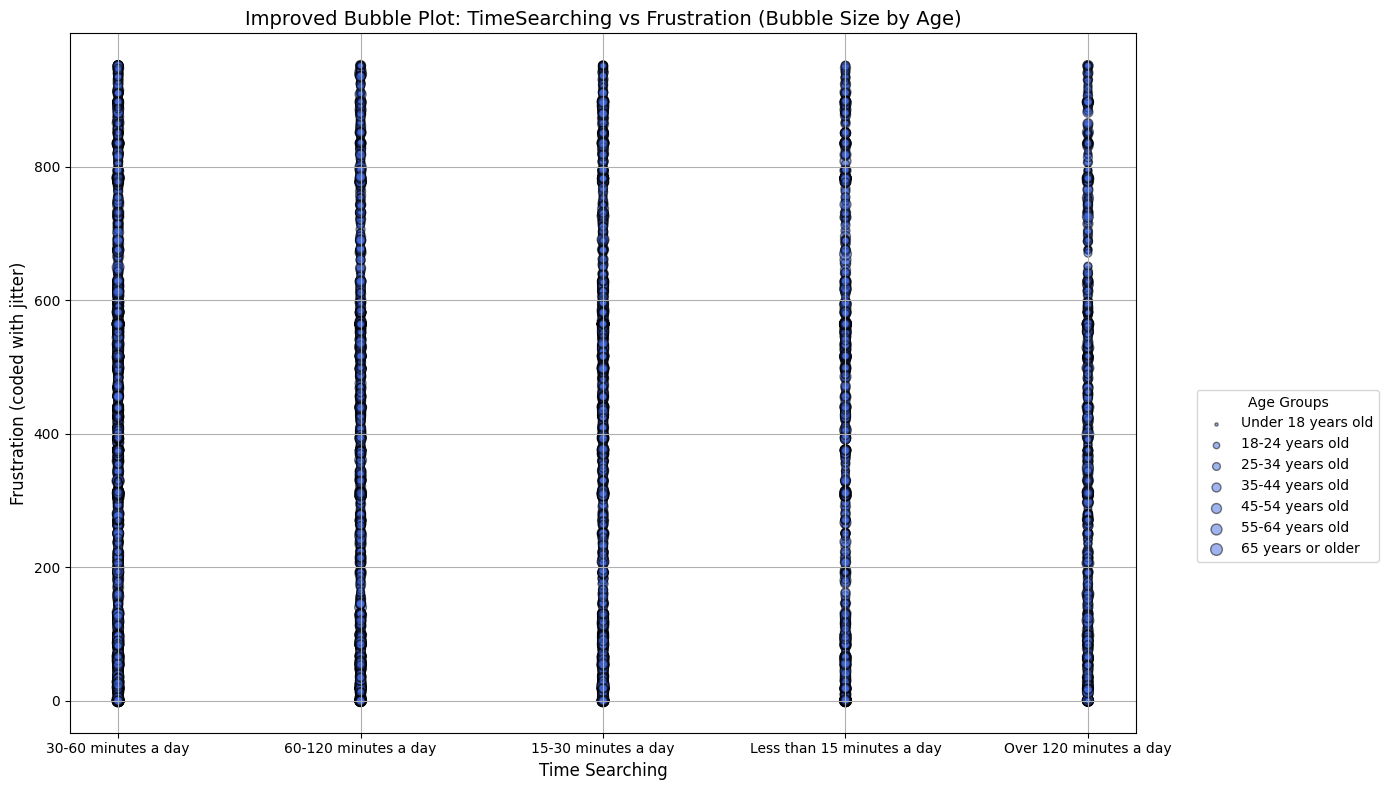

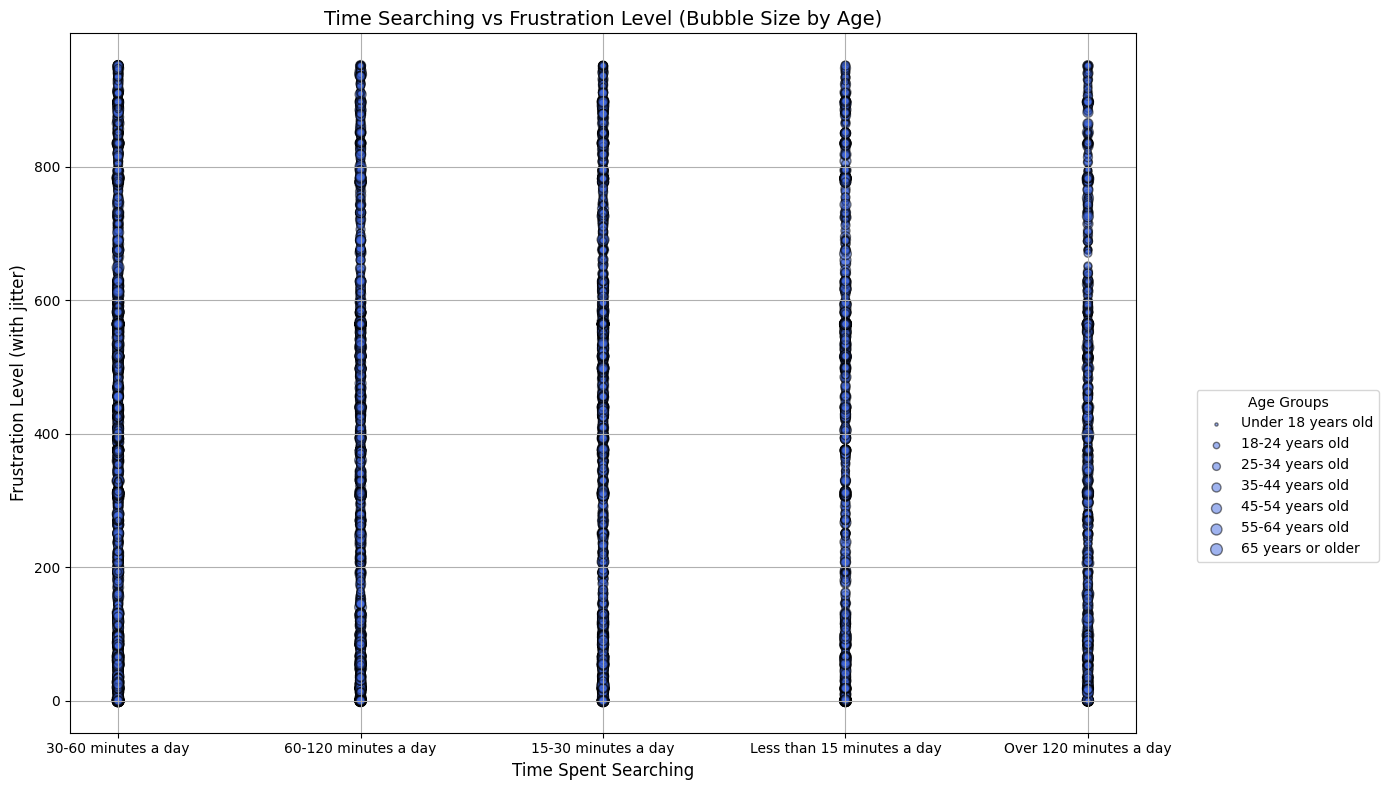

In [59]:
!pip install seaborn
import seaborn as sns
import numpy as np

# Connect to DB
conn = sqlite3.connect('survey-data.sqlite')
QUERY = """
SELECT TimeSearching, Frustration, Age 
FROM main
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# print(df['Frustration'].unique())
# Map Age to bubble sizes
age_map = {
    'Under 18 years old': 5,
    '18-24 years old': 21,
    '25-34 years old': 31.5,
    '35-44 years old': 41.5,
    '45-54 years old': 51.5,
    '55-64 years old': 61.5,
    '65 years or older': 71,
    'Prefer not to say': None
}
df['Age_Size'] = df['Age'].map(age_map)    

# Drop missing age sizes
df = df.dropna(subset=['Age_Size'])

# Use ordered categories for TimeSearching
time_order = [
    "Less than 15 minutes a day",
    "15-30 minutes a day",
    "30-60 minutes a day",
    "60-120 minutes a day",
    "Over 120 minutes a day"
]
df['TimeSearching'] = pd.Categorical(df['TimeSearching'], categories=time_order, ordered=True)

# Create a numeric Frustration_Code with jitter
df['Frustration_Code'] = df['Frustration'].astype('category').cat.codes
df['Frustration_Code_Jitter'] = df['Frustration_Code'] + np.random.uniform(-0.3, 0.3, size=len(df))

# Create improved bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=df['TimeSearching'],
    y=df['Frustration_Code_Jitter'],
    s=df['Age_Size'],
    alpha=0.5,
    c='royalblue',
    edgecolors='black'
)

# Add bubble legend (optional)
for age, size in age_map.items():
    if size:
        plt.scatter([], [], s=size, label=age, alpha=0.5, c='royalblue', edgecolors='black')
plt.legend(
    title='Age Groups',
    loc='best',
    bbox_to_anchor=(1.05, 0.5),  #shifted to right
    frameon=True
)


# Labels and formatting
plt.title('Improved Bubble Plot: TimeSearching vs Frustration (Bubble Size by Age)', fontsize=14)
plt.xlabel('Time Searching', fontsize=12)
plt.ylabel('Frustration (coded with jitter)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Close DB
conn.close()
#PRACTICE


# Connect to database and load data
conn = sqlite3.connect('survey-data.sqlite')
QUERY = """
SELECT TimeSearching, Frustration, Age FROM main 
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL 
""" 
df = pd.read_sql_query(QUERY, conn)

# Define age to bubble size mapping
age_map = {
    'Under 18 years old': 5,
    '18-24 years old': 21,
    '25-34 years old': 31.5,
    '35-44 years old': 41.5,
    '45-54 years old': 51.5,
    '55-64 years old': 61.5,
    '65 years or older': 71,
    'Prefer not to say': None
}

# Map ages to sizes and clean data
df['Age_Size'] = df['Age'].map(age_map)  # Create size column
df = df.dropna(subset=['Age_Size'])  # Remove rows with unmapped ages

# Define time categories and convert to ordered categorical
time_order = [
    "Less than 15 minutes a day",
    "15-30 minutes a day",
    "30-60 minutes a day",
    "60-120 minutes a day",
    "Over 120 minutes a day"
]
df['TimeSearching'] = pd.Categorical(df['TimeSearching'], 
                                   categories=time_order,
                                   ordered=True)

# Convert Frustration to numerical codes and add jitter
df['Frustration_code'] = df['Frustration'].astype('category').cat.codes
df['Frustration_Code_Jitter'] = df['Frustration_code'] + np.random.uniform(-0.3, 0.3, size=len(df))

# Create the bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=df['TimeSearching'],
    y=df['Frustration_Code_Jitter'],
    s=df['Age_Size'],  # Bubble sizes
    alpha=0.5,  # Transparency
    c='royalblue',  # Color
    edgecolors='black'  # Border color
)

# Create legend entries for age groups
for age, size in age_map.items():
    if size:
        plt.scatter([], [], s=size, label=age, alpha=0.5, c='royalblue', edgecolors='black')

# Format the legend
plt.legend(
    title='Age Groups',
    loc='best',
    bbox_to_anchor=(1.05, 0.5)  # Position outside plot
)
# Add titles and labels
plt.title('Time Searching vs Frustration Level (Bubble Size by Age)', fontsize=14)
plt.xlabel('Time Spent Searching', fontsize=12)
plt.ylabel('Frustration Level (with jitter)', fontsize=12)
plt.grid(True)
plt.tight_layout()  # Prevent overlap
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


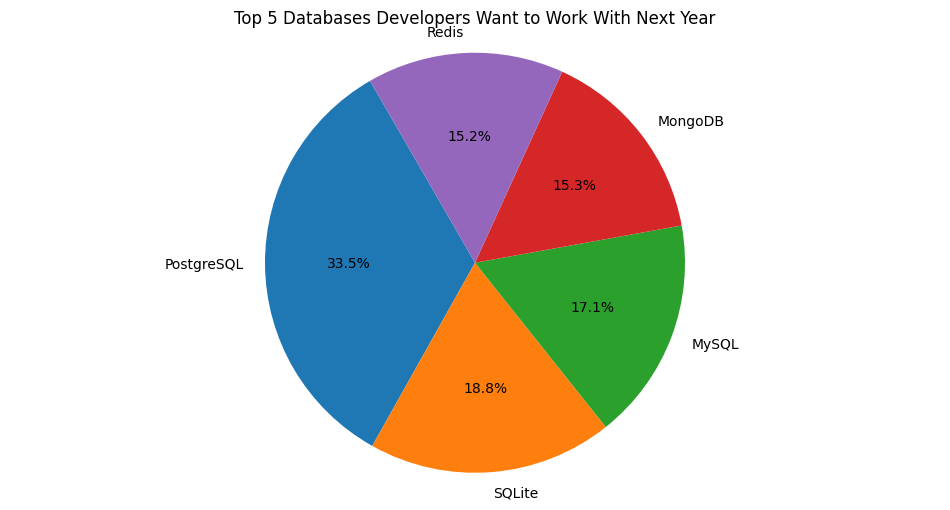

In [15]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')
QUERY ="SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df= pd.read_sql_query(QUERY, conn) 

df_series =df['DatabaseWantToWorkWith'].str.split(';').explode()

top5 = df_series.value_counts().nlargest(5)
plt.figure(figsize = (12,6)) 
plt.pie(top5, labels =top5.index, autopct = '%1.1f%%', startangle = 120) 
plt.title('Top 5 Databases Developers Want to Work With Next Year')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.show()

conn = sqlite3.connect('survey-data.sqlite')



**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


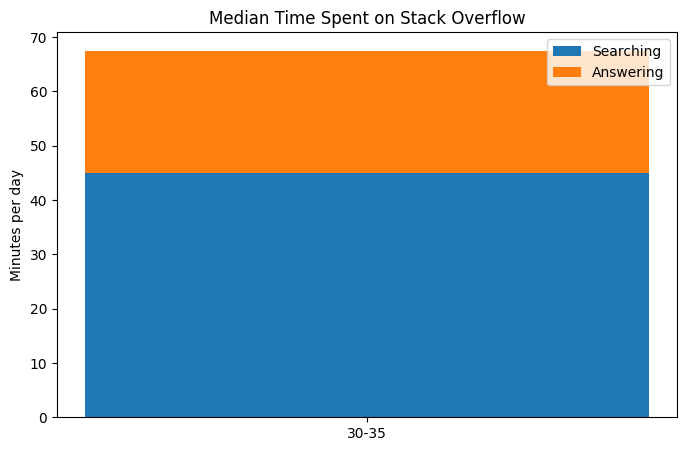

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database and get data
conn = sqlite3.connect('survey-data.sqlite')
query = """
SELECT TimeSearching, TimeAnswering 
FROM main 
WHERE Age IN ('25-34 years old', '35-44 years old')
  AND TimeSearching IS NOT NULL
  AND TimeAnswering IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert time to minutes
time_map = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}
df['Search'] = df['TimeSearching'].map(time_map)
df['Answer'] = df['TimeAnswering'].map(time_map)

# Create chart
plt.figure(figsize=(8,5))
plt.bar('30-35', df['Search'].median(), label='Searching')
plt.bar('30-35', df['Answer'].median(), bottom=df['Search'].median(), 
        label='Answering')

plt.ylabel('Minutes per day')
plt.title('Median Time Spent on Stack Overflow')
plt.legend()
plt.show()

conn.close()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [1]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Get data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql("""
    SELECT Age, AVG(CompTotal) as salary
    FROM main 
    WHERE Age IN ('45-54 years old','55-64 years old') 
    AND CompTotal < 10000000
    GROUP BY Age""", conn)
df['Age'] = df['Age'].str.replace(' years old','')

# Line plot
plt.plot(df['Age'], df['salary'], marker='o', color='green', linewidth=2)
for x, y in zip(df['Age'], df['salary']):
    plt.text(x, y, f'${y:,.0f}', ha='left', va='bottom')
plt.title('Median Salary (Ages 45-60)')
plt.ylabel('Salary ($)')
plt.grid(True, linestyle='--', alpha=0.3) 
plt.show()
conn.close()

ModuleNotFoundError: No module named 'pandas'

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


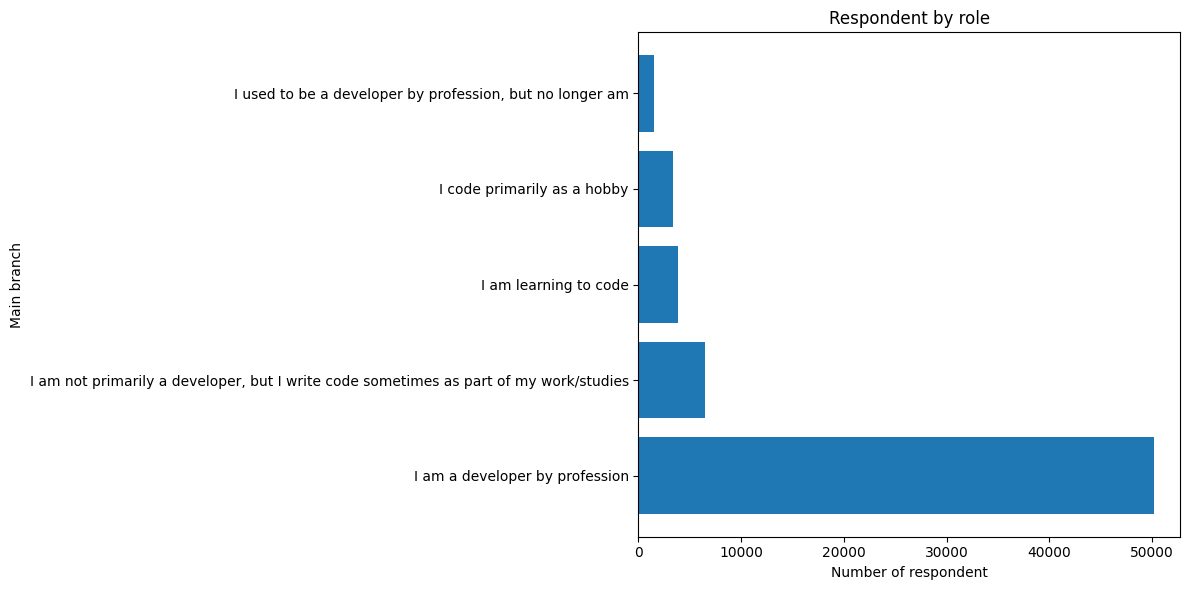

In [26]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')
QUERY = """
SELECT MainBranch, COUNT(*) AS count FROM main
GROUP BY MainBranch
ORDER BY count DESC
""" 
df = pd.read_sql_query(QUERY, conn) 

plt.figure(figsize = (12, 6)) 
plt.barh(df['MainBranch'], df['count']) 
plt.title('Respondent by role')
plt.xlabel('Number of respondent') 
plt.ylabel('Main branch') 
plt.tight_layout()
plt.show()
conn.close()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [28]:
conn.close()

### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
